# Waffle Plots
Like many people, I have strong opinions about pie charts. Mostly that you shouldn't use them. One alternative that has been suggested is to create what's called a waffle plot (because it <i>had</i> to be a food name). The waffle plot is essentially a rectangular version of the pie chart. Unfortunately, <code>matplotlib</code> does not have a built-in waffle plot. This notebook shows my efforts to create a waffle plot function using <code>matplotlib</code>. 

# Introduction
To begin, I'm not the first person to try this. I drew a lot of inspiration (and code) from https://stackoverflow.com/questions/41400136/how-to-do-waffle-charts-in-python-square-piechart.  
Shoutout especially to stackoverflow user https://stackoverflow.com/users/3417688/justin-fletcher whose answer was my starting point for this notebook. 

Having said that though, there were a few things I wanted to change. In his original answer, there were two legends: one showing the color gradient and a second showing the classes with their numeric value. I removed the first legend since we're dealing with a discrete variable (categories) rather than a continuous one hence the color gradient which would have been appropriate for a heat map was not really meaningful for the waffle plot. I moved the second legend (showing the classes) from beneath the waffle plot to the right hand side. This second legend also appeared to be using colors that did not match the actual colors used in the plot (grey for instance instead of light blue). I think that the problem was that they were manually calculating the color values multiple times within the <code>for i, c in enumerate(classes)</code> loop. I got around this by using <code>np.linspace</code> to calculate all the values up front. I changed the function definition to have default height, width, and colormap so that I could get rid the namespace of a couple of superfluous variables. 

# Code
Now for the code, feel free to copy/paste in your work. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Let's make a default data frame with catagories and values.
df = pd.DataFrame({ 'catagories': ['cat1', 'cat2', 'cat3', 'cat4'], 
                    'values': [84911, 14414, 10062, 8565] })

classes = df['catagories']
values = df['values']

def waffle_plot(classes, values, height=7, width=20, colormap=plt.cm.coolwarm):

    # Compute the portion of the total assigned to each class.
    class_portion = [float(v)/sum(values) for v in values]

    # Compute the number of tiles for each catagories.
    total_tiles = width * height
    tiles_per_class = [round(p*total_tiles) for p in class_portion]

    # Make a dummy matrix for use in plotting.
    plot_matrix = np.zeros((height, width))

    # Popoulate the dummy matrix with integer values.
    class_index = 0
    tile_index = 0

    # Iterate over each tile.
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # If the number of tiles populated is sufficient for this class...
            if tile_index > sum(tiles_per_class[0:class_index]):

                # ...increment to the next class.
                class_index += 1       

            # Set the class value to an integer, which increases with class.
            plot_matrix[row, col] = class_index

    # Create a new figure.
    fig = plt.figure()

    # Using matshow solves your "non-square" problem. 
    plt.matshow(plot_matrix, cmap=colormap)

    # Get the axis.
    ax = plt.gca()

    # Minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True);
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True);

    # Gridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    # Manually constructing a legend solves your "catagorical" problem.
    legend_handles = []
    color_val = colormap(np.linspace(0, 1, len(classes)))
    for i, c in enumerate(classes):
        label_str = c + " (" + str(values[i]) + ")"
        legend_handles.append(mpatches.Patch(color=color_val[i], label=label_str))

    # Add the legend. Put it outside and to the right. 
    plt.legend(handles=legend_handles, ncol=1,
               bbox_to_anchor=(0.68, 0.5, 0.5, 0.5))

    plt.xticks([])
    plt.yticks([])
    plt.show()

# Results

<Figure size 432x288 with 0 Axes>

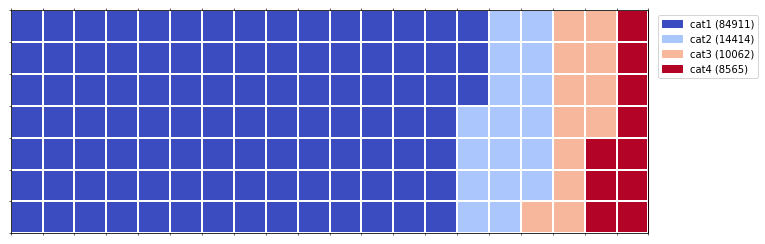

In [2]:
# Call the plotting function.
waffle_plot(classes, values)

In [3]:
fmli154 = pd.read_csv(r'https://raw.githubusercontent.com/clayknappen/CE-Trees-and-Linear-Regression/master/fmli154.csv', 
                     usecols=['TOTEXPPQ', 'FINCBTXM'])
fmli154.head()

,TOTEXPPQ,FINCBTXM
0,27956.9500,143671.0
1,15853.7499,54450.0
2,19793.0986,288646.8
3,11432.4500,23819.0
4,7660.7000,113219.0


In [4]:
deciles = ['First', 'Second', 'Third', 'Fourth', 'Fifth', 
           'Sixth', 'Seventh', 'Eigth', 'Ninth', 'Tenth']

fmli154['INCDECILE'] = pd.qcut(fmli154['FINCBTXM'], 10, labels=deciles)

tot_exp = fmli154['TOTEXPPQ'].sum()

gp = fmli154.groupby('INCDECILE').agg({
    'TOTEXPPQ' : np.sum
})

gp['PERCENT'] = round(100*(gp['TOTEXPPQ']/tot_exp), 1)
gp

,TOTEXPPQ,PERCENT
INCDECILE,,
First,2.497354e+06,4.4
Second,2.570421e+06,4.5
Third,3.497662e+06,6.1
Fourth,3.793669e+06,6.6
Fifth,4.292540e+06,7.5
Sixth,5.231491e+06,9.2
Seventh,6.162790e+06,10.8
Eigth,7.119051e+06,12.5
Ninth,8.455215e+06,14.8


<Figure size 432x288 with 0 Axes>

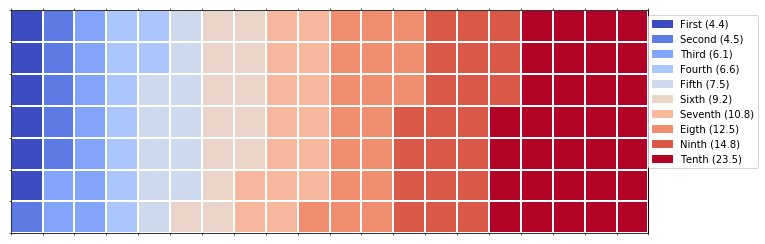

In [5]:
waffle_plot(gp.index, gp['PERCENT'])